<a href="https://colab.research.google.com/github/2025-02-FML-team/WV-Team/blob/water_wine_classification/WaterWineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ======== 경로 설정 ========
WINE_DIR = "/content/Wine_Bottle_Crops"
WATER_DIR = "/content/Water_Bottle_Crops"
IMAGE_SIZE = (225, 225)
RANDOM_STATE = 42

# ======== 이미지 로드 함수 ========
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if not filename.lower().endswith(".jpg"):
            continue
        path = os.path.join(folder, filename)
        try:
            with Image.open(path) as im:
                im = im.convert("RGB")
                im = im.resize(IMAGE_SIZE)
                arr = np.asarray(im, dtype=np.uint8)
                images.append(arr)
                labels.append(label)
        except Exception as e:
            print(f" {filename} 로드 실패: {e}")
    return images, labels

# ======== 두 폴더에서 이미지 불러오기 ========
wine_imgs, wine_labels = load_images_from_folder(WINE_DIR, "wine")
water_imgs, water_labels = load_images_from_folder(WATER_DIR, "water")

# ======== 병합 ========
X = np.array(wine_imgs + water_imgs)
y = np.array(wine_labels + water_labels)

print("총 이미지 수:", len(y))
print("wine:", y.tolist().count("wine"))
print("water:", y.tolist().count("water"))

# ======== 라벨 인코딩 ========
le = LabelEncoder()
y_int = le.fit_transform(y)  # wine=1, water=0 (자동 결정됨)
print("\n클래스 매핑:", dict(zip(le.classes_, le.transform(le.classes_))))

# ======== train/test 분리 ========
train_images, test_images, train_labels, test_labels = train_test_split(
    X, y_int, test_size=0.2, random_state=RANDOM_STATE, stratify=y_int
)

print("\n데이터셋 크기:")
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

# ======== 데이터 분포 확인 (네 코드용) ========
train_label_names = le.inverse_transform(train_labels)
test_label_names = le.inverse_transform(test_labels)

print("\nTrain 라벨 분포:")
print(pd.Series(train_label_names).value_counts())

print("\nTest 라벨 분포:")
print(pd.Series(test_label_names).value_counts())

총 이미지 수: 2979
wine: 1417
water: 1562

클래스 매핑: {np.str_('water'): np.int64(0), np.str_('wine'): np.int64(1)}

데이터셋 크기:
train_images: (2383, 225, 225, 3)
test_images: (596, 225, 225, 3)

Train 라벨 분포:
water    1249
wine     1134
Name: count, dtype: int64

Test 라벨 분포:
water    313
wine     283
Name: count, dtype: int64


In [4]:
import pandas as pd

# train 데이터 분포 확인
train_label_names = le.inverse_transform(train_labels)
test_label_names = le.inverse_transform(test_labels)

print(" Train 라벨")
print(pd.Series(train_label_names).value_counts())

print("\nTest 라벨")
print(pd.Series(test_label_names).value_counts())

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

train_images = train_images.reshape((train_images.shape[0], 225*225*3))
test_images  = test_images.reshape((test_images.shape[0], 225*225*3))
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255

print(train_images.shape, train_images.dtype)
print(train_labels.shape, train_labels[:10])

 Train 라벨
water    1249
wine     1134
Name: count, dtype: int64

Test 라벨
water    313
wine     283
Name: count, dtype: int64
(2383, 151875) float32
(2383,) [1 0 0 1 0 1 0 0 0 1]


In [ ]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.5217 - loss: 151.8902
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6800 - loss: 10.6010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6244 - loss: 16.1910
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7616 - loss: 6.8906
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8095 - loss: 5.7048
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7209 - loss: 8.5730
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7539 - loss: 5.6840
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7649 - loss: 7.8106
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8056 - loss: 6.0924
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8312 - loss: 4.3372
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8743 - loss: 3.1828
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9855 - loss: 0.1008
0.9748322367668152


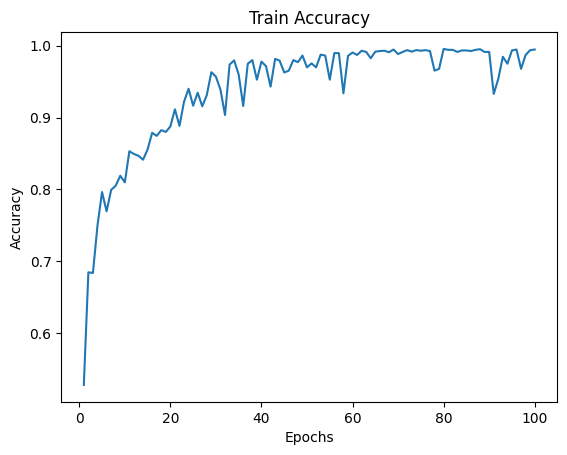

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1, len(history.history['accuracy'])+1), history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.show()

---------------

In [ ]:
!pip install ultralytics --quiet
!pip install tqdm --quiet

# 2️⃣ 라이브러리 불러오기
from ultralytics import YOLO
import os, cv2
from tqdm import tqdm

# 3️⃣ 경로 설정
INPUT_DIR = "/content/Wine Bottle"          # 원본 이미지 폴더
OUTPUT_DIR = "/content/Wine_Bottle_Crops"   # 자른 이미지 저장 폴더
LOG_FILE = "/content/crop_progress.log"     # 진행상황 기록 파일
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 4️⃣ YOLOv8 모델 로드 (yolov8n: 빠르고 가벼움)
model = YOLO("yolov8n.pt")

# 5️⃣ resume용: 이미 처리한 파일 불러오기
done_files = set()
if os.path.exists(LOG_FILE):
    with open(LOG_FILE, "r") as f:
        done_files = set(line.strip() for line in f if line.strip())

# 6️⃣ jpg 파일만 불러오기
all_images = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(".jpg")]

print(f"총 이미지 수: {len(all_images)}장")
print(f"이미 처리된 이미지 수: {len(done_files)}장")
print(f"남은 이미지 수: {len(all_images) - len(done_files)}장\n")

# 7️⃣ batch 처리
batch_size = 16  # Colab T4 기준 안정적 (조금 높여도 됨)

for i in tqdm(range(0, len(all_images), batch_size)):
    batch_files = all_images[i:i+batch_size]
    batch_paths = [os.path.join(INPUT_DIR, f) for f in batch_files if f not in done_files]

    if not batch_paths:
        continue

    results = model.predict(batch_paths, verbose=False)

    for img_path, result in zip(batch_paths, results):
        img_name = os.path.basename(img_path)
        img = cv2.imread(img_path)
        boxes = result.boxes
        cls_names = result.names
        cropped_any = False

        for box in boxes:
            cls_id = int(box.cls[0])
            label = cls_names[cls_id].lower()
            if "bottle" in label:  # bottle만 crop
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                crop = img[y1:y2, x1:x2]
                crop_name = f"{os.path.splitext(img_name)[0]}_bottle_crop.jpg"
                crop_path = os.path.join(OUTPUT_DIR, crop_name)
                cv2.imwrite(crop_path, crop)
                cropped_any = True

        # 진행상황 저장 (resume)
        with open(LOG_FILE, "a") as f:
            f.write(img_name + "\n")

        if not cropped_any:
            print(f"⚠ 탐지 실패: {img_name}")

print("\n✅ 모든 JPG 이미지에서 bottle crop 완료!")
print(f"📁 저장 위치: {OUTPUT_DIR}")

ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [ ]:
import os

folder_path = "/content/Wine_Bottle_Crops"  # 폴더 경로
count = len([f for f in os.listdir(folder_path) if f.lower().endswith(".jpg")])

print(f"📸 폴더 '{folder_path}' 안에 있는 JPG 이미지 개수: {count}장")

📸 폴더 '/content/Wine_Bottle_Crops' 안에 있는 JPG 이미지 개수: 1417장


In [ ]:
!pip install ultralytics

# 2. 라이브러리 불러오기
from ultralytics import YOLO
import cv2
import os

# 3. 미리 학습된 YOLOv8 모델 불러오기
# (사람, 병, 컵, 자동차 등 다양한 물체 감지 가능)
model = YOLO('yolov8x.pt')

# 4. 이미지 폴더 경로
IMAGE_DIR = "/content/Wine Bottle"
OUTPUT_DIR = "/content/Wine_Bottle_Crops"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 5. 모든 이미지 순회하며 와인병 탐지 & crop
for img_name in os.listdir(IMAGE_DIR):
    if not img_name.lower().endswith(('.jpg', '.png', '.jpeg', '.webp')):
        continue

    img_path = os.path.join(IMAGE_DIR, img_name)
    results = model(img_path)

    for r in results:
        boxes = r.boxes
        cls_names = r.names
        img = cv2.imread(img_path)

        for box in boxes:
            cls_id = int(box.cls[0])
            label = cls_names[cls_id].lower()

            if "bottle" in label:  # YOLO가 감지한 'bottle'만 crop
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                crop = img[y1:y2, x1:x2]
                crop_path = os.path.join(OUTPUT_DIR, f"{os.path.splitext(img_name)[0]}_crop.jpg")
                cv2.imwrite(crop_path, crop)

print("✅ 모든 이미지에서 와인병 crop 완료!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/Wine Bottle/00000669.jpg: 640x640 1 bottle, 4264.1ms
Speed: 15.2ms preprocess, 4264.1ms inference, 30.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Wine Bottle/00004110.jpg: 640x640 1 bottle, 4501.0ms
Speed: 4.0ms preprocess, 4501.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Wine Bottle/00002034.jpg: 640x640 2 bottles, 1 chair, 4432.9ms
Speed: 6.8ms preprocess, 4432.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Wine Bottle/00000709.jpg: 640x640 1 cell phone, 3926.6ms
Speed: 

KeyboardInterrupt: 